# Peaksearch class example

Basic example showing the peaksearch class capabilities.

In [1]:
from nasagamma import spectrum as sp
import numpy as np
import pandas as pd
from nasagamma import peaksearch as ps

# dataset 1
file = "data/SSR-mcnp.hdf"
df = pd.read_hdf(file, key='data')

# delete first (large) bin
df = df.iloc[1:,:]

cts_np = df.cts.to_numpy() * 1e8
erg = np.array(df.index)
chan = np.arange(0,len(cts_np),1)

# instantiate a Spectrum object
spect = sp.Spectrum(counts=cts_np, energies=erg)

We need to provide reference values for the fwhm at a specific channel.

In [2]:
# Required input parameters (in channels)
fwhm_at_0 = 1.0
ref_fwhm = 35
ref_x = 1220

We then instantiate a peaksearch object which runs a spectral deconvolution technique based on the code written in: https://github.com/lbl-anp/becquerel. Note that we need to pass in a spectrum object.

In [3]:
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=1)

The kernel used for the deconvolution technique mentioned above looks as follows:

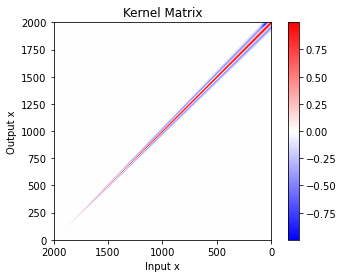

In [4]:
search.plot_kernel()

This kernel matrix takes into account the variation of the FWHM as a function of energy. Note how the "noise" is separated from the "signal". We can now plot the different components of the spectrum:


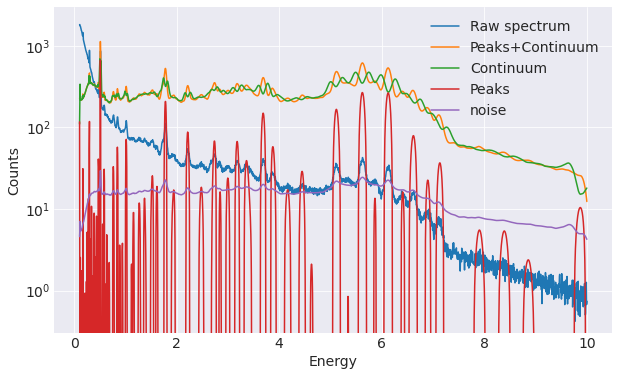

In [5]:
search.plot_components()

The detected peaks with the specified min_snr value is as follows:

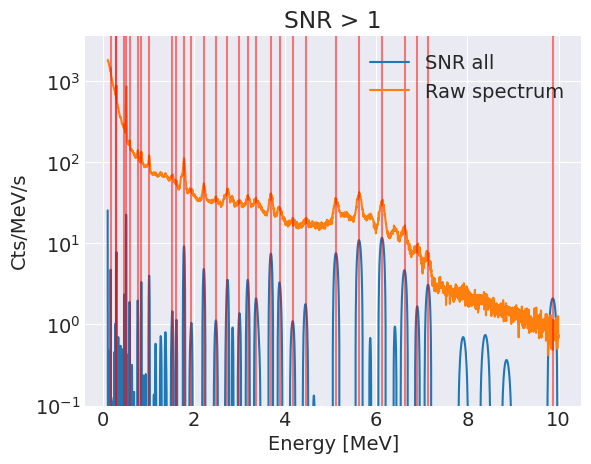

In [7]:
search.plot_peaks()

This algorithm for peak finding is very efficient and accurate. It will serve as the starting input for the peak fitting routine.